In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Load datasets

X_train = pd.read_parquet("/Users/ilseoplee/enivornmental_impact_of_aviation-2/Test-Train-Validation Data/X_train.parquet")
X_test = pd.read_parquet("/Users/ilseoplee/enivornmental_impact_of_aviation-2/Test-Train-Validation Data/X_test.parquet")
X_val = pd.read_parquet("/Users/ilseoplee/enivornmental_impact_of_aviation-2/Test-Train-Validation Data/X_val.parquet")
y_train = pd.read_parquet("/Users/ilseoplee/enivornmental_impact_of_aviation-2/Test-Train-Validation Data/y_train.parquet").squeeze()
y_test = pd.read_parquet("/Users/ilseoplee/enivornmental_impact_of_aviation-2/Test-Train-Validation Data/y_test.parquet").squeeze()
y_val = pd.read_parquet("/Users/ilseoplee/enivornmental_impact_of_aviation-2/Test-Train-Validation Data/y_val.parquet").squeeze()

In [ ]:
df = pd.read_parquet("https://github.com/monatagelsir7/enivornmental_impact_of_aviation/raw/refs/heads/main/cleaned_aviation_data_v3.parquet")

,airline_iata,acft_icao,acft_class,seymour_proxy,source,seats,n_flights,iata_departure,iata_arrival,departure_lon,...,distance_km,ask,rpk,fuel_burn_seymour,fuel_burn,co2,domestic,log_co2,log_distance,co2_per_distance
0,1SQ,PA32,PP,P28B,BTS,62112.0,11466.5,SPN,TIQ,145.729004,...,17.765225,1.103434e+06,9.092294e+05,20.486379,2.349071e+05,7.423063e+05,1,13.517519,2.932005,41784.233355
1,1SQ,PA32,PP,P28B,BTS,62112.0,11466.5,TIQ,SPN,145.619003,...,17.765225,1.103434e+06,9.092294e+05,20.486379,2.349071e+05,7.423063e+05,1,13.517519,2.932005,41784.233355
2,HA,B712,NB,B712,BTS,1246720.0,9740.0,HNL,OGG,-157.924228,...,162.001417,2.019704e+08,1.664236e+08,1305.895783,1.271942e+07,4.019338e+07,1,17.509213,5.093759,248105.130283
3,HA,B712,NB,B712,BTS,1246720.0,9740.0,OGG,HNL,-156.431212,...,162.001417,2.019704e+08,1.664236e+08,1305.895783,1.271942e+07,4.019338e+07,1,17.509213,5.093759,248105.130283
4,HA,B712,NB,B712,BTS,879296.0,6869.5,HNL,KOA,-157.924228,...,262.778946,2.310605e+08,1.903938e+08,1567.819046,1.077013e+07,3.403362e+07,1,17.342859,5.575111,129514.257569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291639,ACN,None,None,None,ANAC,4.5,4.0,SXO,CGB,-50.689602,...,736.539053,3.314426e+03,2.731087e+03,4223.750606,1.010269e+02,3.192451e+02,1,5.769087,6.603319,0.433439
291640,ACN,None,None,None,ANAC,4.5,4.0,QDV,CGH,-46.943921,...,57.645994,2.594070e+02,2.137513e+02,4223.750606,4.807282e+01,1.519101e+02,1,5.029850,4.071519,2.635224
291643,ACN,None,None,None,ANAC,4.5,4.0,QDV,POO,-46.943921,...,153.120924,6.890442e+02,5.677724e+02,4223.750606,5.527809e+01,1.746788e+02,1,5.168657,5.037738,1.140790
291644,ACN,None,None,None,ANAC,4.5,4.0,RRJ,QDV,-43.372194,...,366.577348,1.649598e+03,1.359269e+03,4223.750606,7.167492e+01,2.264927e+02,1,5.427118,5.906934,0.617858


In [5]:
# X_train["domestic"] = X_train["domestic_x"]  # or "domestic_y"
# X_train.drop(columns=["domestic_x", "domestic_y"], inplace=True)

# X_train["domestic"] = X_train["domestic"].astype("category")

# X_val["domestic"] = X_val["domestic_x"]
# X_val.drop(columns=["domestic_x", "domestic_y"], inplace=True)
# X_val["domestic"] = X_val["domestic"].astype("category")

# X_test["domestic"] = X_test["domestic_x"]
# X_test.drop(columns=["domestic_x", "domestic_y"], inplace=True)
# X_test["domestic"] = X_test["domestic"].astype("category")

In [ ]:
for i in [X_train, X_test, X_val]:
    i["is_widebody"] = i["is_widebody"].astype("category")
    i["domestic"] = i["domestic"].astype("category")
    i["is_narrowbody"] = i["is_narrowbody"].astype("category")

In [7]:
original_cats = df[
    [
        "acft_class",
        "departure_country",
        "arrival_country",
        "departure_continent",
        "arrival_continent",
        # "domestic",
        # "is_widebody",
        # "is_narrowbody",
    ]
]

In [ ]:
X_train = X_train.merge(original_cats, left_index=True, right_index=True)
X_val = X_val.merge(original_cats, left_index=True, right_index=True)
X_test = X_test.merge(original_cats, left_index=True, right_index=True)

In [9]:
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_features

['seats',
 'n_flights',
 'ask',
 'rpk',
 'fuel_burn',
 'fuel_burn_per_seat',
 'ask_per_seat',
 'ask_per_flight']

In [10]:
original_cats = [
    "acft_class",
    "departure_country",
    "arrival_country",
    "departure_continent",
    "arrival_continent",
    "domestic",
    "is_widebody",
    "is_narrowbody",
    "same_continent",
]

In [11]:
encoded_only_cols = [
    col
    for col in X_train.columns
    if col not in original_cats and col not in numeric_features
]
X_train.drop(columns=encoded_only_cols, inplace=True)
X_test.drop(columns=encoded_only_cols, inplace=True)
X_val.drop(columns=encoded_only_cols, inplace=True)

In [12]:
X_train

,seats,n_flights,domestic,ask,rpk,fuel_burn,same_continent,fuel_burn_per_seat,ask_per_seat,ask_per_flight,is_widebody,is_narrowbody,acft_class,departure_country,arrival_country,departure_continent,arrival_continent
58430,10465.000000,57.5,1,2.938172e+07,2.421054e+07,4.652493e+05,True,44.457651,2807.618186,5.109865e+05,0,1,NB,US,US,NA,NA
14544,2896.000000,362.0,1,1.694946e+06,1.396635e+06,8.759352e+04,True,30.246381,585.271316,4.682171e+03,0,0,TP,US,US,NA,NA
1846,84480.714650,1204.5,1,1.655428e+07,1.364072e+07,5.234898e+05,True,6.196560,195.953331,1.374369e+04,0,0,TP,DK,DK,EU,EU
54864,4734.286624,67.5,0,2.427359e+06,2.000144e+06,5.740993e+04,False,12.126416,512.719083,3.596088e+04,0,0,TP,EH,MA,AF,AF
167771,249.093750,1.5,0,3.495171e+05,2.880021e+05,7.456522e+03,False,29.934600,1403.154844,2.330114e+05,0,1,NB,MA,FR,AF,EU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279080,7537.253500,4.0,0,1.093306e+07,9.008846e+06,2.695980e+05,False,35.768734,1450.536981,2.733266e+06,0,0,None,IN,MM,AS,AS
132911,586.404777,3.0,0,1.724257e+05,1.420788e+05,6.839698e+03,False,11.663782,294.038697,5.747523e+04,0,1,NB,CH,DE,EU,EU
198702,14.000000,1.0,0,1.100371e+05,9.067059e+04,1.935812e+04,False,1382.722798,7859.794836,1.100371e+05,0,0,PJ,US,CH,NA,EU
30457,13169.761510,174.0,0,1.078796e+07,8.889277e+06,2.967378e+05,False,22.531755,819.145991,6.199975e+04,0,0,TP,AT,CH,EU,EU


In [13]:
for df_split in [X_train, X_val, X_test]:
    df_split.drop(columns="seats", inplace=True)

In [14]:
for i in X_train, X_test, X_val:
    i["acft_class"].fillna("Unknown", inplace=True)

C:\Users\Afag\AppData\Local\Temp\ipykernel_8364\1062177129.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  i["acft_class"].fillna("Unknown", inplace=True)


In [15]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np


categorical_cols = [
    "acft_class",
    "departure_country",
    "arrival_country",
    "departure_continent",
    "arrival_continent",
    "domestic",
    "is_widebody",
    "is_narrowbody",
    "same_continent",
]

for col in categorical_cols:
    X_train[col] = X_train[col].astype("category")
    X_test[col] = X_test[col].astype("category")
    X_val[col] = X_val[col].astype("category")

train_pool = Pool(X_train, y_train, cat_features=categorical_cols)
val_pool = Pool(X_val, y_val, cat_features=categorical_cols)
test_pool = Pool(X_test, y_test, cat_features=categorical_cols)

model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=8,
    loss_function="RMSE",
    early_stopping_rounds=50,
    verbose=100,
)

model.fit(train_pool, eval_set=val_pool)

y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

print("\nCatboost Validation Set Evaluation:")
print("R2:", r2_score(y_val, y_val_pred))
print("MAE:", mean_absolute_error(y_val, y_val_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_val_pred)))

print("\n Catboost Test Set Evaluation:")
print("R2:", r2_score(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

0:	learn: 5123.9242731	test: 4953.3569385	best: 4953.3569385 (0)	total: 673ms	remaining: 11m 12s
100:	learn: 295.1735379	test: 366.3034545	best: 366.3034545 (100)	total: 33.4s	remaining: 4m 56s
200:	learn: 217.6004664	test: 303.9464536	best: 303.9464536 (200)	total: 1m 2s	remaining: 4m 6s
300:	learn: 181.5564850	test: 277.2179326	best: 277.2179326 (300)	total: 1m 27s	remaining: 3m 24s
400:	learn: 159.3778027	test: 261.8106130	best: 261.8106130 (400)	total: 1m 56s	remaining: 2m 53s
500:	learn: 144.7615016	test: 251.7446504	best: 251.7446504 (500)	total: 2m 21s	remaining: 2m 21s
600:	learn: 133.5191629	test: 245.1262715	best: 245.1262715 (600)	total: 2m 46s	remaining: 1m 50s
700:	learn: 124.3415398	test: 240.7049229	best: 240.7049229 (700)	total: 3m 12s	remaining: 1m 21s
800:	learn: 117.2157062	test: 236.8522488	best: 236.8522488 (800)	total: 3m 38s	remaining: 54.2s
900:	learn: 110.8381077	test: 233.9375842	best: 233.9375842 (900)	total: 4m 3s	remaining: 26.8s
999:	learn: 105.6107698	tes

## Feature importances

####For Loss Change

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

loss_change_importance = model.get_feature_importance(
    train_pool, type="LossFunctionChange"
)
feature_names = X_train.columns

loss_change_df = pd.DataFrame(
    {"Feature": feature_names, "Importance": loss_change_importance}
).sort_values(by="Importance", ascending=False)

C:\Users\Afag\AppData\Local\Temp\ipykernel_8364\503528695.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loss_change_df.head(10), y="Feature", x="Importance", palette="magma")


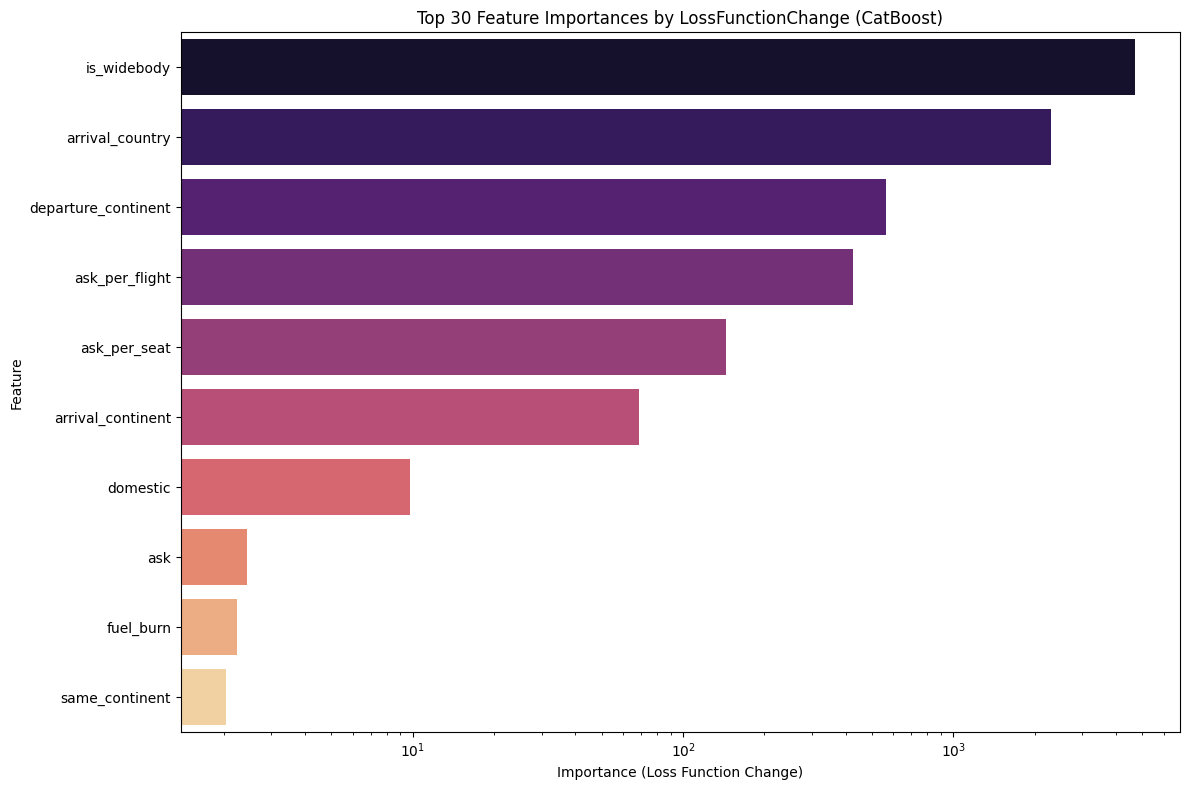

In [59]:
plt.figure(figsize=(12, 8))
sns.barplot(data=loss_change_df.head(10), y="Feature", x="Importance", palette="magma")
plt.title("Top 30 Feature Importances by LossFunctionChange (CatBoost)")
plt.xscale("log")
plt.xlabel("Importance (Loss Function Change)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## Limiting the Y axis to exactly see the changes in R2

### Saving RMSE results

In [ ]:
eval_results = model.get_evals_result()
iterations = len(eval_results["validation"]["RMSE"])
######## For RMSE
test_rmse = []
for i in range(1, iterations + 1):
    y_test_pred_i = model.predict(X_test, ntree_end=i)
    rmse_i = np.sqrt(mean_squared_error(y_test, y_test_pred_i))
    test_rmse.append(rmse_i)

df_eval = pd.DataFrame(
    {
        "Iteration": range(1, iterations + 1),
        "Train RMSE": eval_results["learn"]["RMSE"],
        "Validation RMSE": eval_results["validation"]["RMSE"],
        "Test RMSE": test_rmse,
    }
)

######## For R2
train_r2 = []
val_r2 = []
test_r2 = []

# Loop through each iteration and compute R2

for i in range(1, iterations + 1):
    # Predict at current iteration
    y_train_pred_i = model.predict(X_train, ntree_end=i)
    y_val_pred_i = model.predict(X_val, ntree_end=i)
    y_test_pred_i = model.predict(X_test, ntree_end=i)

    # Compute R2
    train_r2.append(r2_score(y_train, y_train_pred_i))
    val_r2.append(r2_score(y_val, y_val_pred_i))
    test_r2.append(r2_score(y_test, y_test_pred_i))

# Build DataFrame
df_r2 = pd.DataFrame(
    {
        "Iteration": range(1, iterations + 1),
        "Train R2": train_r2,
        "Validation R2": val_r2,
        "Test R2": test_r2,
    }
)

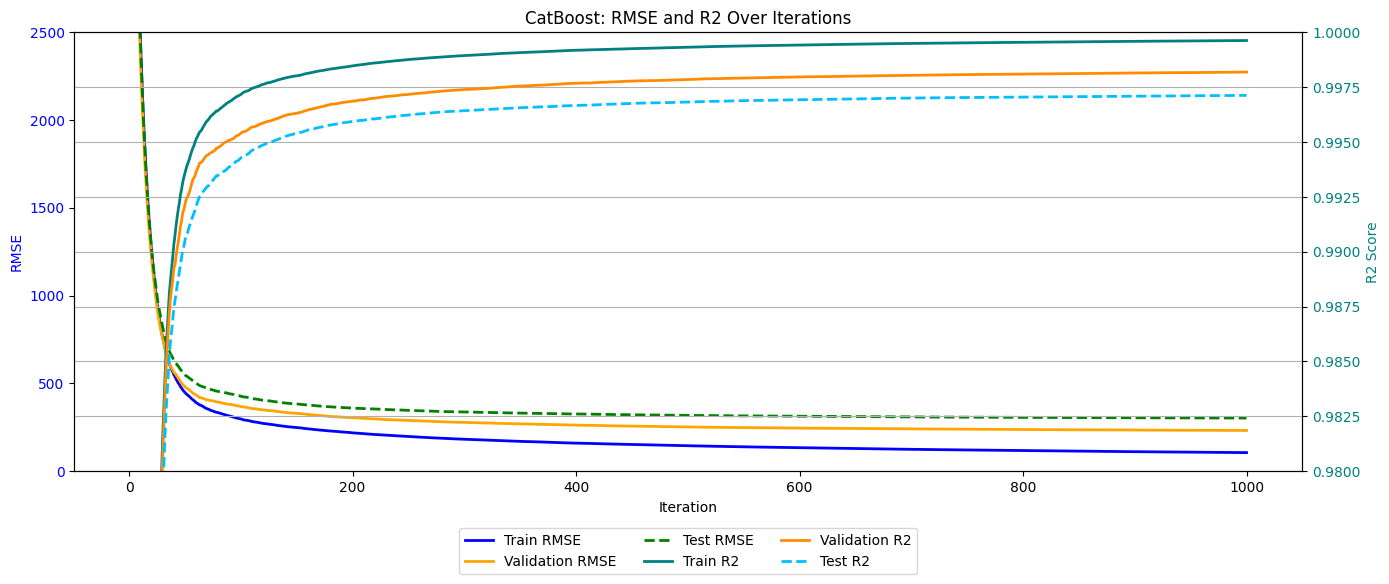

In [33]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# RMSE on Left Axis
ax1.set_xlabel("Iteration")
ax1.set_ylabel("RMSE", color="blue")
line1 = ax1.plot(
    df_eval["Iteration"],
    df_eval["Train RMSE"],
    label="Train RMSE",
    color="blue",
    linewidth=2,
)
line2 = ax1.plot(
    df_eval["Iteration"],
    df_eval["Validation RMSE"],
    label="Validation RMSE",
    color="orange",
    linewidth=2,
)
line3 = ax1.plot(
    df_eval["Iteration"],
    df_eval["Test RMSE"],
    label="Test RMSE",
    color="green",
    linestyle="--",
    linewidth=2,
)
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_ylim(0, 2500)  # Adjusting y limits based on RMSE range we want to see

# R2 on Right Axis
ax2 = ax1.twinx()
ax2.set_ylabel("R2 Score", color="teal")
line4 = ax2.plot(
    df_r2["Iteration"], df_r2["Train R2"], label="Train R2", color="teal", linewidth=2
)
line5 = ax2.plot(
    df_r2["Iteration"],
    df_r2["Validation R2"],
    label="Validation R2",
    color="darkorange",
    linewidth=2,
)
line6 = ax2.plot(
    df_r2["Iteration"],
    df_r2["Test R2"],
    label="Test R2",
    color="deepskyblue",
    linestyle="--",
    linewidth=2,
)
ax2.tick_params(axis="y", labelcolor="teal")
ax2.set_ylim(0.98, 1.0)  # Adjusting y limits based on R2 range we want to see

lines = line1 + line2 + line3 + line4 + line5 + line6
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="lower center", bbox_to_anchor=(0.5, -0.25), ncol=3)

plt.title("CatBoost: RMSE and R2 Over Iterations")
plt.grid(True)
plt.tight_layout()
plt.show()

## Applying Cross Validation to Catboost

In [34]:
df

,airline_iata,acft_icao,acft_class,seymour_proxy,source,seats,n_flights,iata_departure,iata_arrival,departure_lon,...,distance_km,ask,rpk,fuel_burn_seymour,fuel_burn,co2,domestic,log_co2,log_distance,co2_per_distance
0,1SQ,PA32,PP,P28B,BTS,62112.0,11466.5,SPN,TIQ,145.729004,...,17.765225,1.103434e+06,9.092294e+05,20.486379,2.349071e+05,7.423063e+05,1,13.517519,2.932005,41784.233355
1,1SQ,PA32,PP,P28B,BTS,62112.0,11466.5,TIQ,SPN,145.619003,...,17.765225,1.103434e+06,9.092294e+05,20.486379,2.349071e+05,7.423063e+05,1,13.517519,2.932005,41784.233355
2,HA,B712,NB,B712,BTS,1246720.0,9740.0,HNL,OGG,-157.924228,...,162.001417,2.019704e+08,1.664236e+08,1305.895783,1.271942e+07,4.019338e+07,1,17.509213,5.093759,248105.130283
3,HA,B712,NB,B712,BTS,1246720.0,9740.0,OGG,HNL,-156.431212,...,162.001417,2.019704e+08,1.664236e+08,1305.895783,1.271942e+07,4.019338e+07,1,17.509213,5.093759,248105.130283
4,HA,B712,NB,B712,BTS,879296.0,6869.5,HNL,KOA,-157.924228,...,262.778946,2.310605e+08,1.903938e+08,1567.819046,1.077013e+07,3.403362e+07,1,17.342859,5.575111,129514.257569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291639,ACN,None,None,None,ANAC,4.5,4.0,SXO,CGB,-50.689602,...,736.539053,3.314426e+03,2.731087e+03,4223.750606,1.010269e+02,3.192451e+02,1,5.769087,6.603319,0.433439
291640,ACN,None,None,None,ANAC,4.5,4.0,QDV,CGH,-46.943921,...,57.645994,2.594070e+02,2.137513e+02,4223.750606,4.807282e+01,1.519101e+02,1,5.029850,4.071519,2.635224
291643,ACN,None,None,None,ANAC,4.5,4.0,QDV,POO,-46.943921,...,153.120924,6.890442e+02,5.677724e+02,4223.750606,5.527809e+01,1.746788e+02,1,5.168657,5.037738,1.140790
291644,ACN,None,None,None,ANAC,4.5,4.0,RRJ,QDV,-43.372194,...,366.577348,1.649598e+03,1.359269e+03,4223.750606,7.167492e+01,2.264927e+02,1,5.427118,5.906934,0.617858


In [35]:
df.columns

Index(['airline_iata', 'acft_icao', 'acft_class', 'seymour_proxy', 'source',
       'seats', 'n_flights', 'iata_departure', 'iata_arrival', 'departure_lon',
       'departure_lat', 'departure_country', 'departure_continent',
       'arrival_lon', 'arrival_lat', 'arrival_country', 'arrival_continent',
       'seats_no_est_scaling', 'distance_km', 'ask', 'rpk',
       'fuel_burn_seymour', 'fuel_burn', 'co2', 'domestic', 'log_co2',
       'log_distance', 'co2_per_distance'],
      dtype='object')

In [36]:
df["is_widebody"] = df["acft_class"] == "WB"
df["is_narrowbody"] = df["acft_class"] == "NB"
df["same_continent"] = df["departure_continent"] == df["arrival_continent"]
df.loc[:, "fuel_burn_per_seat"] = df["fuel_burn"] / df["seats"]
df.loc[:, "ask_per_seat"] = df["ask"] / df["seats"]
df.loc[:, "ask_per_flight"] = df["ask"] / df["n_flights"]

,airline_iata,acft_icao,acft_class,seymour_proxy,source,seats,n_flights,iata_departure,iata_arrival,departure_lon,...,rpk,fuel_burn_seymour,fuel_burn,co2,domestic,log_co2,log_distance,co2_per_distance,is_widebody,is_narrowbody
0,1SQ,PA32,PP,P28B,BTS,62112.0,11466.5,SPN,TIQ,145.729004,...,9.092294e+05,20.486379,2.349071e+05,7.423063e+05,1,13.517519,2.932005,41784.233355,False,False
1,1SQ,PA32,PP,P28B,BTS,62112.0,11466.5,TIQ,SPN,145.619003,...,9.092294e+05,20.486379,2.349071e+05,7.423063e+05,1,13.517519,2.932005,41784.233355,False,False
2,HA,B712,NB,B712,BTS,1246720.0,9740.0,HNL,OGG,-157.924228,...,1.664236e+08,1305.895783,1.271942e+07,4.019338e+07,1,17.509213,5.093759,248105.130283,False,True
3,HA,B712,NB,B712,BTS,1246720.0,9740.0,OGG,HNL,-156.431212,...,1.664236e+08,1305.895783,1.271942e+07,4.019338e+07,1,17.509213,5.093759,248105.130283,False,True
4,HA,B712,NB,B712,BTS,879296.0,6869.5,HNL,KOA,-157.924228,...,1.903938e+08,1567.819046,1.077013e+07,3.403362e+07,1,17.342859,5.575111,129514.257569,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291639,ACN,None,None,None,ANAC,4.5,4.0,SXO,CGB,-50.689602,...,2.731087e+03,4223.750606,1.010269e+02,3.192451e+02,1,5.769087,6.603319,0.433439,False,False
291640,ACN,None,None,None,ANAC,4.5,4.0,QDV,CGH,-46.943921,...,2.137513e+02,4223.750606,4.807282e+01,1.519101e+02,1,5.029850,4.071519,2.635224,False,False
291643,ACN,None,None,None,ANAC,4.5,4.0,QDV,POO,-46.943921,...,5.677724e+02,4223.750606,5.527809e+01,1.746788e+02,1,5.168657,5.037738,1.140790,False,False
291644,ACN,None,None,None,ANAC,4.5,4.0,RRJ,QDV,-43.372194,...,1.359269e+03,4223.750606,7.167492e+01,2.264927e+02,1,5.427118,5.906934,0.617858,False,False


In [ ]:
X = df[
    [
        "acft_class",
        "n_flights",
        "departure_continent",
        "arrival_continent",
        "departure_country",
        "arrival_country",
        "domestic",
        "ask",
        "rpk",
        "fuel_burn",
        "is_widebody",
        "is_narrowbody",
        "same_continent",
        "ask_per_seat",
        "fuel_burn_per_seat",
        "ask_per_flight",
    ]
]

In [43]:
X["acft_class"].fillna("Unknown", inplace=True)

C:\Users\Afag\AppData\Local\Temp\ipykernel_8364\1222310397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["acft_class"].fillna("Unknown", inplace=True)


In [ ]:
y = df["co2_per_distance"]

In [44]:
from catboost import Pool, cv
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

for col in categorical_cols:
    df[col] = df[col].astype("category")

full_pool = Pool(X, y, cat_features=categorical_cols)

params = {
    "iterations": 1000,
    "learning_rate": 0.1,
    "depth": 8,
    "loss_function": "RMSE",
    "early_stopping_rounds": 50,
    "verbose": False,
}


cv_results = cv(
    params=params,
    pool=full_pool,
    fold_count=5,
    shuffle=True,
    partition_random_seed=42,
    plot=False,
    verbose_eval=False,
)

Training on fold [0/5]

bestTest = 142.5191848
bestIteration = 999

Training on fold [1/5]

bestTest = 146.2542868
bestIteration = 999

Training on fold [2/5]

bestTest = 161.5284516
bestIteration = 999

Training on fold [3/5]

bestTest = 436.2448673
bestIteration = 998

Training on fold [4/5]

bestTest = 288.7879465
bestIteration = 999



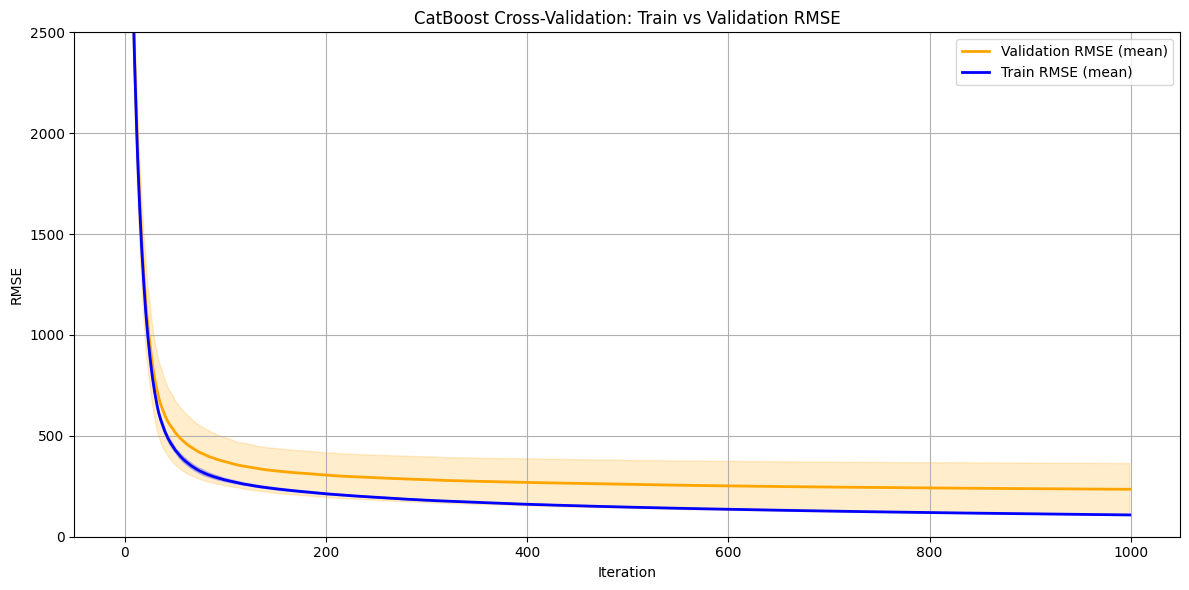

In [46]:
# Plot RMSE mean and std for training and validation
plt.figure(figsize=(12, 6))

plt.plot(
    cv_results["iterations"],
    cv_results["test-RMSE-mean"],
    label="Validation RMSE (mean)",
    color="orange",
    linewidth=2,
)
plt.fill_between(
    cv_results["iterations"],
    cv_results["test-RMSE-mean"] - cv_results["test-RMSE-std"],
    cv_results["test-RMSE-mean"] + cv_results["test-RMSE-std"],
    alpha=0.2,
    color="orange",
)

plt.plot(
    cv_results["iterations"],
    cv_results["train-RMSE-mean"],
    label="Train RMSE (mean)",
    color="blue",
    linewidth=2,
)
plt.fill_between(
    cv_results["iterations"],
    cv_results["train-RMSE-mean"] - cv_results["train-RMSE-std"],
    cv_results["train-RMSE-mean"] + cv_results["train-RMSE-std"],
    alpha=0.2,
    color="blue",
)

plt.title("CatBoost Cross-Validation: Train vs Validation RMSE")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.ylim(0, 2500)
plt.tight_layout()
plt.show()

## Kfold

In [47]:
from sklearn.model_selection import KFold


r2_scores, mae_scores, rmse_scores = [], [], []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
for train_index, val_index in kf.split(X):
    X_tr, X_val = X.iloc[train_index], X.iloc[val_index]
    y_tr, y_val = y.iloc[train_index], y.iloc[val_index]

    train_pool = Pool(X_tr, y_tr, cat_features=categorical_cols)
    val_pool = Pool(X_val, y_val, cat_features=categorical_cols)

    model = CatBoostRegressor(
        iterations=1000,
        learning_rate=0.1,
        depth=8,
        loss_function="RMSE",
        early_stopping_rounds=50,
        verbose=0,
    )
    model.fit(train_pool, eval_set=val_pool)

    # Predict and evaluate
    y_pred = model.predict(X_val)
    r2_scores.append(r2_score(y_val, y_pred))
    mae_scores.append(mean_absolute_error(y_val, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_pred)))

    print(
        f"Fold {fold} -- R2: {r2_scores[-1]:.4f}, MAE: {mae_scores[-1]:.2f}, RMSE: {rmse_scores[-1]:.2f}"
    )
    fold += 1

Fold 1 -- R2: 0.9993, MAE: 47.99, RMSE: 148.42
Fold 2 -- R2: 0.9990, MAE: 48.11, RMSE: 171.19
Fold 3 -- R2: 0.9993, MAE: 48.05, RMSE: 158.11
Fold 4 -- R2: 0.9994, MAE: 45.17, RMSE: 138.62
Fold 5 -- R2: 0.9992, MAE: 46.62, RMSE: 149.41


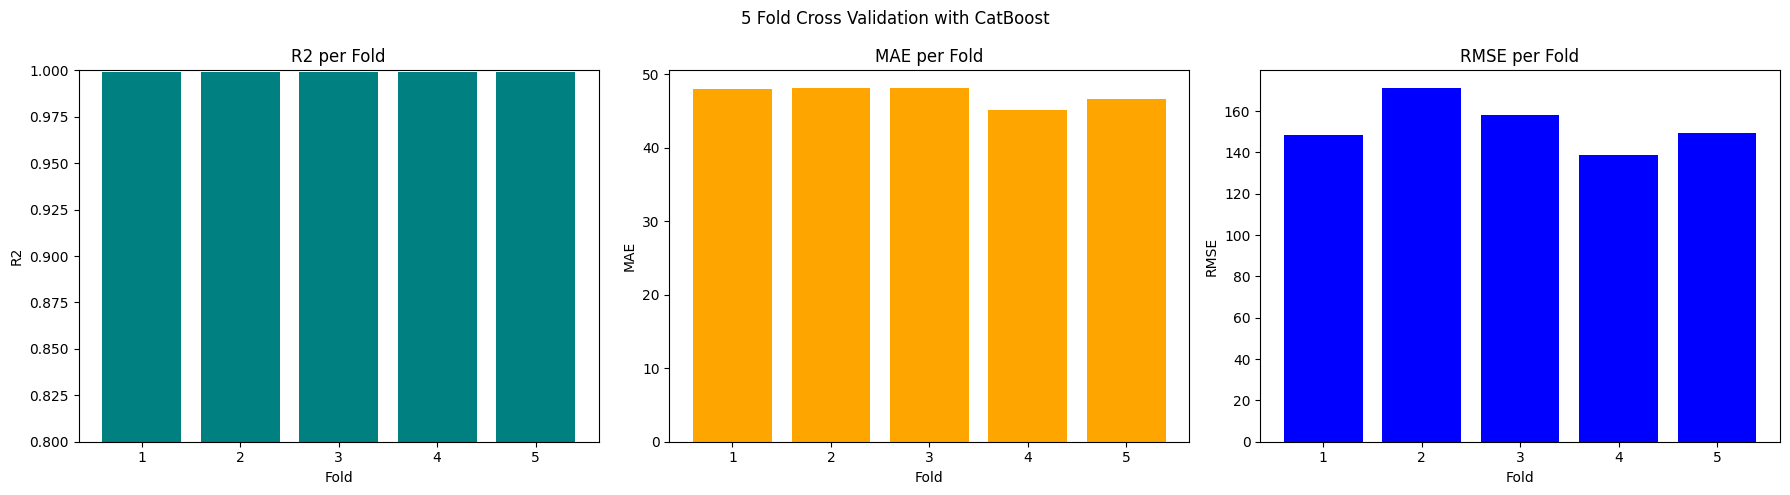

In [48]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

folds = list(range(1, 6))
axs[0].bar(folds, r2_scores, color="teal")
axs[0].set_title("R2 per Fold")
axs[0].set_ylim(0.8, 1.0)
axs[0].set_ylabel("R2")
axs[0].set_xlabel("Fold")

axs[1].bar(folds, mae_scores, color="orange")
axs[1].set_title("MAE per Fold")
axs[1].set_ylabel("MAE")
axs[1].set_xlabel("Fold")

axs[2].bar(folds, rmse_scores, color="blue")
axs[2].set_title("RMSE per Fold")
axs[2].set_ylabel("RMSE")
axs[2].set_xlabel("Fold")

plt.suptitle("5 Fold Cross Validation with CatBoost")
plt.tight_layout()
plt.show()

### Predictions and fitting on whole train dataste

In [76]:
X_full_train = pd.concat([X_train, X_val])
y_full_train = pd.concat([y_train, y_val])

In [ ]:
train_pool = Pool(X_full_train, y_full_train, cat_features=categorical_cols)
test_pool = Pool(X_test, y_test, cat_features=categorical_cols)

final_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=8,
    loss_function="RMSE",
    early_stopping_rounds=50,
    verbose=100,
)

final_model.fit(train_pool, eval_set=test_pool)

y_test_pred = final_model.predict(X_test)
y_all_pred = final_model.predict(pd.concat([X_train, X_val, X_test]))

# Evaluate
print("Final Model Evaluation on Test Set:")
print("R²:", r2_score(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

0:	learn: 5095.9784108	test: 5150.9407065	best: 5150.9407065 (0)	total: 208ms	remaining: 3m 27s
100:	learn: 289.3488017	test: 356.9841594	best: 356.9841594 (100)	total: 20.7s	remaining: 3m 4s
200:	learn: 216.9069000	test: 284.4649766	best: 284.4649766 (200)	total: 41.5s	remaining: 2m 45s
300:	learn: 182.5759227	test: 258.8011614	best: 258.8011614 (300)	total: 1m 2s	remaining: 2m 25s
400:	learn: 161.3101286	test: 244.2524431	best: 244.2524431 (400)	total: 1m 24s	remaining: 2m 5s
500:	learn: 146.2437857	test: 234.6528674	best: 234.6528674 (500)	total: 1m 48s	remaining: 1m 47s
600:	learn: 134.3396921	test: 227.5508369	best: 227.5508369 (600)	total: 2m 15s	remaining: 1m 30s
700:	learn: 125.5480734	test: 222.6376913	best: 222.6376913 (700)	total: 2m 42s	remaining: 1m 9s
800:	learn: 117.8219006	test: 218.6238067	best: 218.5934270 (799)	total: 3m 9s	remaining: 47.1s
900:	learn: 112.0452495	test: 215.2726529	best: 215.2726529 (900)	total: 3m 36s	remaining: 23.8s
999:	learn: 107.0164881	test: 2

In [ ]:
pd.DataFrame({"y_pred": y_all_pred}).to_csv(
    "catboost_final_predictions.csv", index=False
)